In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal

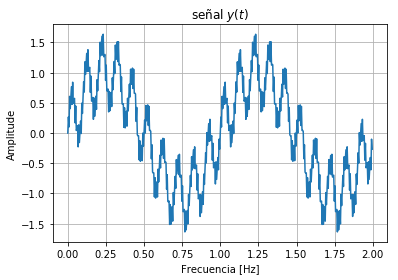

In [27]:
fs_t = 250
t = np.arange(0,2,1/fs_t)
y = np.sin(t*2*np.pi) + 0.5*np.sin(t*2*np.pi*10) + 0.2*np.sin(t*2*np.pi*100)
plt.plot(t,y)
plt.grid()
plt.title("señal $y(t)$")
plt.ylabel("Amplitude")
plt.xlabel("Frecuencia [Hz]")

/home/equipo4/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


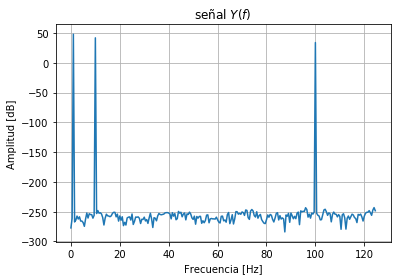

In [15]:
Y = np.fft.fft(y)
vf = np.arange(0,len(Y)/2)*fs_t/len(Y)
Y = Y[0:len(Y)/2]
plt.plot(vf,20 * np.log10(np.abs(Y)))
plt.grid()
plt.title("señal $Y(f)$")
plt.ylabel("Amplitud [dB]")
plt.xlabel("Frecuencia [Hz]")

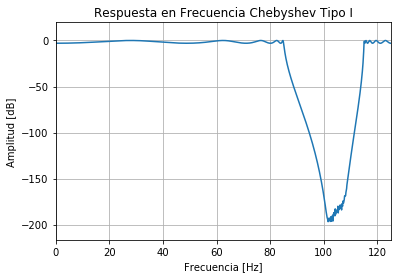

In [69]:
sos = signal.cheby1(10,3,[85*2/fs_t,115*2/fs_t], 'bandstop', analog=False, output='sos')
b,a = signal.sos2tf(sos)
w, h = signal.freqz(b,a,worN=1000)
plt.plot(w*(fs_t/(2*np.pi)), 20 * np.log10(abs(h)))
plt.title("Respuesta en Frecuencia Chebyshev Tipo I")
plt.ylabel("Amplitud [dB]")
plt.xlabel("Frecuencia [Hz]")
plt.margins(0, 0.1)
plt.grid()
plt.show()


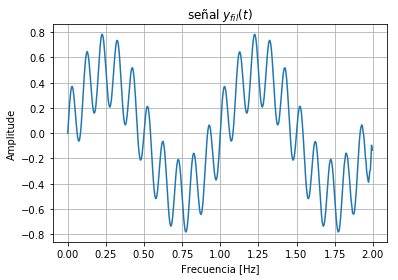

In [65]:
y_fil = signal.sosfiltfilt(sos,y)
plt.plot(t,y_fil)
plt.grid()
plt.title("señal $y_{fil}(t)$")
plt.ylabel("Amplitude")
plt.xlabel("Frecuencia [Hz]")

/home/equipo4/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


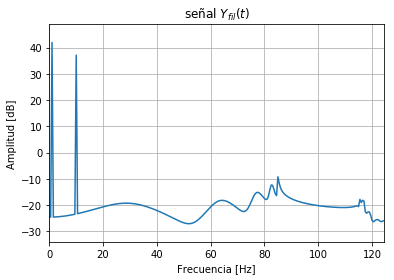

In [66]:
Y_fil = np.fft.fft(y_fil)
vf = np.arange(0,len(Y_fil)/2)*fs_t/len(Y_fil)
Y_fil = Y_fil[0:len(Y_fil)/2]
plt.plot(vf,20 * np.log10(np.abs(Y_fil)))
plt.grid()
plt.title("señal $Y_{fil}(t)$")
plt.ylabel("Amplitud [dB]")
plt.xlabel("Frecuencia [Hz]")
plt.margins(0, 0.1)